# 1. Importación de Librerías

In [2]:
import numpy as np
import pandas as pd
import re
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
data = pd.read_csv('../Data/data_capital.csv',index_col=0)

In [4]:
data.head()

,tipo_propiedad,Provincia,Zona,Localidad,Barrio,place_name,cochera,gimnasio,piscina,SUM,...,balcon,patio,parrilla,floor,rooms,price_usd,sup_cub,sup_descub,sup_total,price_usd_per_m2
0,PH,Capital Federal,CABA,Capital Federal,Mataderos,Mataderos,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,2.0,62000.0,40.0,15.0,55.0,1127.272727
1,apartment,Capital Federal,CABA,Capital Federal,Belgrano,Belgrano,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,NaN,1.0,138000.0,40.0,5.0,45.0,3066.666667
2,apartment,Capital Federal,CABA,Capital Federal,Palermo,Palermo soho,0.0,1.0,1.0,1.0,...,1.0,0.0,0.0,NaN,1.0,111700.0,30.0,20.0,50.0,2234.000000
3,apartment,Capital Federal,CABA,Capital Federal,Palermo,Palermo soho,0.0,1.0,1.0,1.0,...,1.0,0.0,0.0,NaN,1.0,147900.0,31.0,11.0,42.0,3521.428571
4,apartment,Capital Federal,CABA,Capital Federal,Flores,Flores,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,NaN,2.0,75000.0,43.0,0.0,43.0,1744.186047


In [5]:
data.columns

Index(['tipo_propiedad', 'Provincia', 'Zona', 'Localidad', 'Barrio',
       'place_name', 'cochera', 'gimnasio', 'piscina', 'SUM', 'laundry',
       'balcon', 'patio', 'parrilla', 'floor', 'rooms', 'price_usd', 'sup_cub',
       'sup_descub', 'sup_total', 'price_usd_per_m2'],
      dtype='object')

In [6]:
data.shape

(12142, 21)

In [7]:
data.isna().sum()

tipo_propiedad         0
Provincia              0
Zona                   0
Localidad              0
Barrio               472
place_name             0
cochera                0
gimnasio               0
piscina                0
SUM                    0
laundry                0
balcon                 0
patio                  0
parrilla               0
floor               9260
rooms                  0
price_usd              0
sup_cub             1314
sup_descub          1987
sup_total            673
price_usd_per_m2       0
dtype: int64

# 2. Análisis de los Datos

In [8]:
data.describe()

,cochera,gimnasio,piscina,SUM,laundry,balcon,patio,parrilla,floor,rooms,price_usd,sup_cub,sup_descub,sup_total,price_usd_per_m2
count,12142.000000,12142.000000,12142.000000,12142.000000,12142.000000,12142.000000,12142.000000,12142.000000,2882.000000,12142.000000,1.214200e+04,10828.000000,10155.000000,11469.000000,12142.000000
mean,0.340059,0.108631,0.261818,0.261077,0.365920,0.487317,0.205156,0.303986,1.634629,2.064899,1.489550e+05,55.850753,13.386370,69.777067,2367.199874
std,0.473748,0.311189,0.439642,0.439240,0.481707,0.499860,0.403832,0.459996,3.082363,1.118940,1.448320e+05,56.445464,49.596652,94.833156,777.702164
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.861978e+03,10.000000,0.000000,10.000000,62.065932
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,8.700000e+04,33.000000,0.000000,37.000000,1914.893617
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,1.150000e+05,41.000000,4.000000,46.000000,2351.351351
75%,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,2.000000,3.000000,1.520000e+05,49.000000,7.000000,56.000000,2812.500000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,20.000000,7.000000,3.000000e+06,400.000000,797.000000,822.000000,7256.304348


Se puede ver que falta el Barrio en algunas de las observaciones del dataset.

In [9]:
data.loc[data['Barrio'].isna(),['Barrio','place_name']].head()

,Barrio,place_name
11,NaN,Capital federal
12,NaN,Capital federal
13,NaN,Capital federal
14,NaN,Capital federal
15,NaN,Capital federal


Estas filas las dropeamos, por falta de información.

In [10]:
barrio_drop = data.loc[data['Barrio'].isna()].index
data.drop(index=barrio_drop,inplace=True)
data.isna().sum()

tipo_propiedad         0
Provincia              0
Zona                   0
Localidad              0
Barrio                 0
place_name             0
cochera                0
gimnasio               0
piscina                0
SUM                    0
laundry                0
balcon                 0
patio                  0
parrilla               0
floor               9090
rooms                  0
price_usd              0
sup_cub             1265
sup_descub          1836
sup_total            571
price_usd_per_m2       0
dtype: int64

In [11]:
data.notnull().sum()

tipo_propiedad      11670
Provincia           11670
Zona                11670
Localidad           11670
Barrio              11670
place_name          11670
cochera             11670
gimnasio            11670
piscina             11670
SUM                 11670
laundry             11670
balcon              11670
patio               11670
parrilla            11670
floor                2580
rooms               11670
price_usd           11670
sup_cub             10405
sup_descub           9834
sup_total           11099
price_usd_per_m2    11670
dtype: int64

Para el modelo de capital, no sirven las columnas que tienen un unico valor que corresponde a CABA/Capital Federal. Lo mismo ocurre con 'place_name' que en capital será el barrio, o en caso que corresponda, el Sub-Barrio (para los datos disponibles, es solo Palermo Soho).

In [12]:
data.drop(columns=['Provincia','Zona','Localidad','place_name'],inplace=True)

In [13]:
data.head()

,tipo_propiedad,Barrio,cochera,gimnasio,piscina,SUM,laundry,balcon,patio,parrilla,floor,rooms,price_usd,sup_cub,sup_descub,sup_total,price_usd_per_m2
0,PH,Mataderos,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,2.0,62000.0,40.0,15.0,55.0,1127.272727
1,apartment,Belgrano,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,NaN,1.0,138000.0,40.0,5.0,45.0,3066.666667
2,apartment,Palermo,0.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,NaN,1.0,111700.0,30.0,20.0,50.0,2234.000000
3,apartment,Palermo,0.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,NaN,1.0,147900.0,31.0,11.0,42.0,3521.428571
4,apartment,Flores,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,NaN,2.0,75000.0,43.0,0.0,43.0,1744.186047


## Ploteo de Variables Cuantitativas 

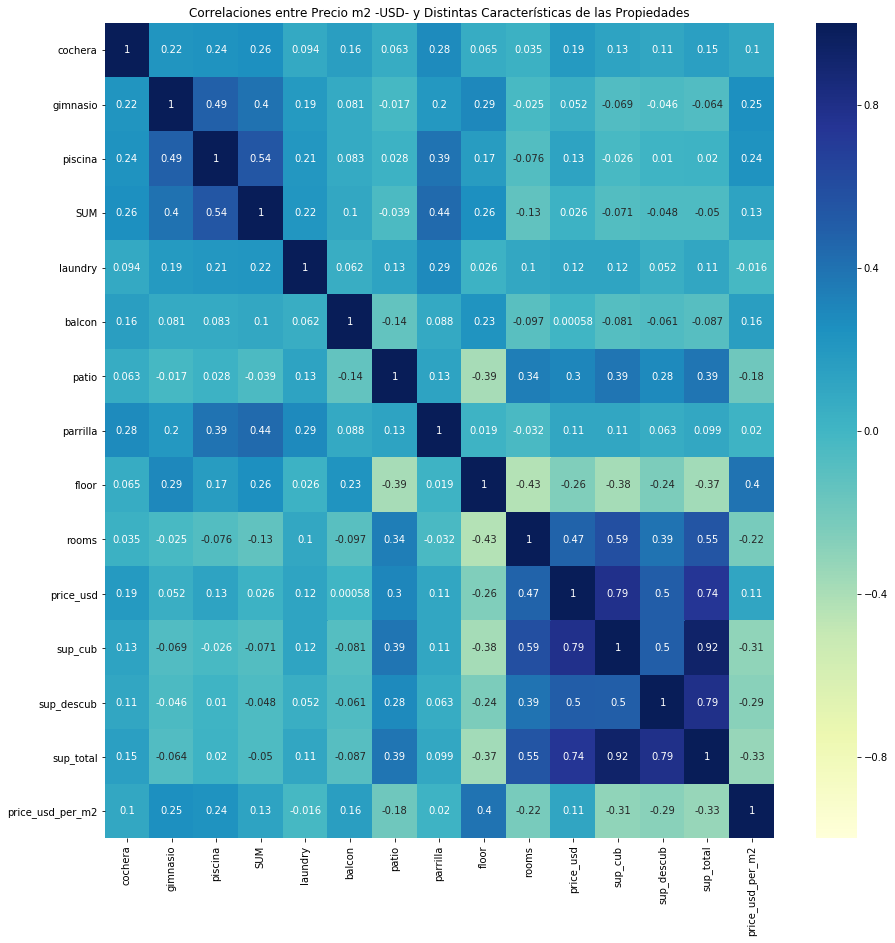

In [14]:
data_amenities=data.loc[:,"cochera":"price_usd_per_m2"]

fig, ax = plt.subplots(figsize=(15,15))
ax.set_title('Correlaciones entre Precio m2 -USD- y Distintas Características de las Propiedades', )

sns.heatmap(data_amenities.corr(), vmin=-1, vmax=1, center=0, cmap="YlGnBu", annot=True);

In [15]:
def add_dummy_vars(df,cat_vars):
    df_dummy = pd.get_dummies(df[cat_vars],drop_first=True,dtype=np.float64)
    df = pd.concat([df,df_dummy],axis=1)
    return df

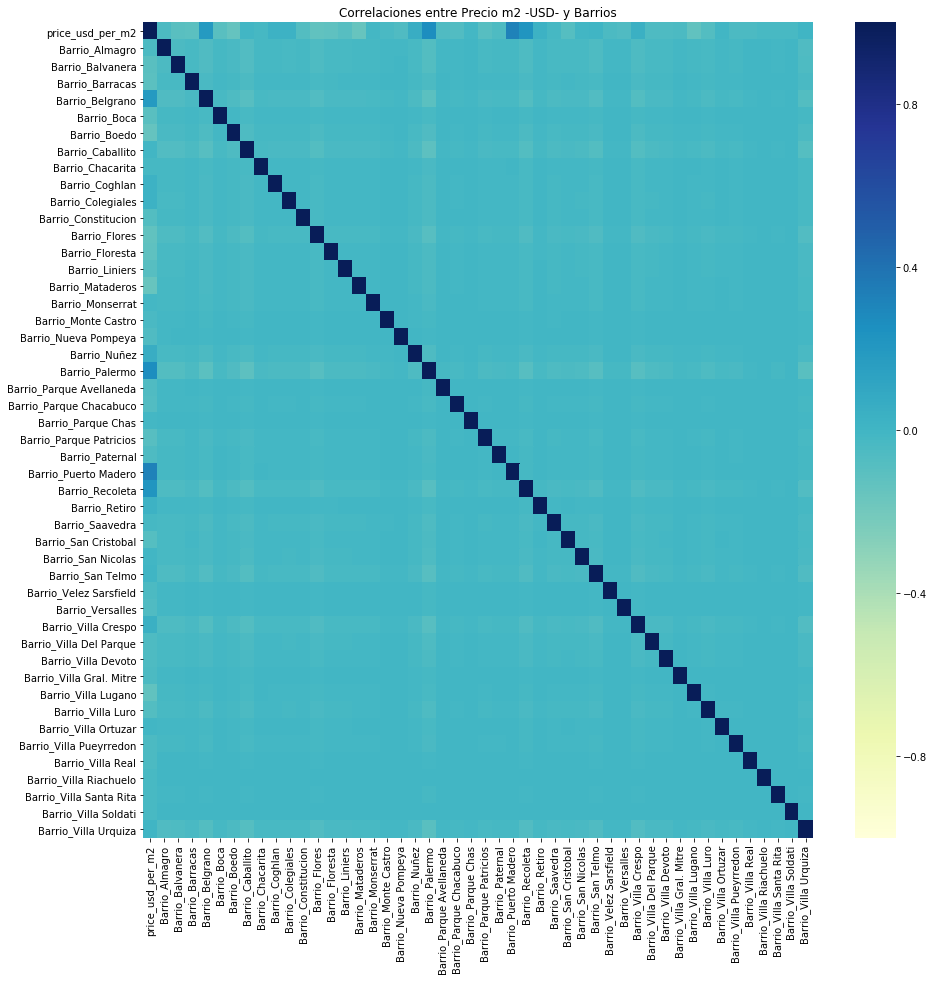

In [16]:
data_localidades = add_dummy_vars(data,['Barrio'])
data_localidades = data_localidades.loc[:,"price_usd_per_m2":'Barrio_Villa Urquiza']

fig, ax = plt.subplots(figsize=(15,15))
ax.set_title('Correlaciones entre Precio m2 -USD- y Barrios', )
sns.heatmap(data_localidades.corr(), vmin=-1, vmax=1, center=0, cmap="YlGnBu");#, annot=True);

## Definición de Variables adicionales

In [17]:
#superficie por rooms, busca encontrar la valoración por ambientes altos
data['sup_por_room']=data['sup_cub']/data['rooms']
data['cub_desc']=data['sup_cub']*data['sup_descub']

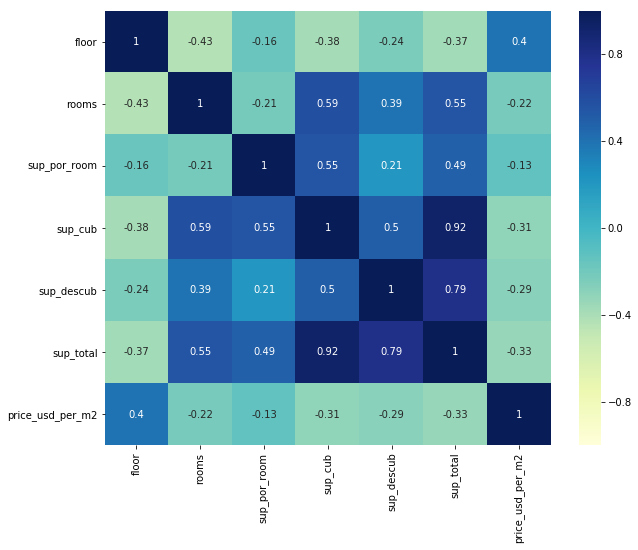

In [18]:
plt.figure(figsize=(10,8))
sns.heatmap(data[['floor','rooms','sup_por_room',"sup_cub","sup_descub",'sup_total','price_usd_per_m2']].corr(),\
            vmin=-1,vmax=1, annot=True,cmap='YlGnBu')
plt.savefig('../Images/CABA/Correlaciones Variables Cuantitativas CABA.png')

# 3. Creación de Variables Dummies

Las dos primeras features (tipo_propiedad y Barrio) son categóricas. Por lo cual se generarán variables dummies para las mismas.

In [18]:
def add_dummy_vars(df,cat_vars):
    df_dummy = pd.get_dummies(df[cat_vars],drop_first=True,dtype=np.float64)
    df = pd.concat([df,df_dummy],axis=1)
    return df

In [19]:
cat_vars = ['tipo_propiedad','Barrio']
data = add_dummy_vars(data,cat_vars)
data.head(5)

,tipo_propiedad,Barrio,cochera,gimnasio,piscina,SUM,laundry,balcon,patio,parrilla,...,Barrio_Villa Gral. Mitre,Barrio_Villa Lugano,Barrio_Villa Luro,Barrio_Villa Ortuzar,Barrio_Villa Pueyrredon,Barrio_Villa Real,Barrio_Villa Riachuelo,Barrio_Villa Santa Rita,Barrio_Villa Soldati,Barrio_Villa Urquiza
0,PH,Mataderos,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,apartment,Belgrano,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,apartment,Palermo,0.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,apartment,Palermo,0.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,apartment,Flores,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [20]:
data.columns

Index(['tipo_propiedad', 'Barrio', 'cochera', 'gimnasio', 'piscina', 'SUM',
       'laundry', 'balcon', 'patio', 'parrilla', 'floor', 'rooms', 'price_usd',
       'sup_cub', 'sup_descub', 'sup_total', 'price_usd_per_m2',
       'sup_por_room', 'cub_desc', 'tipo_propiedad_apartment',
       'tipo_propiedad_house', 'tipo_propiedad_store', 'Barrio_Almagro',
       'Barrio_Balvanera', 'Barrio_Barracas', 'Barrio_Belgrano', 'Barrio_Boca',
       'Barrio_Boedo', 'Barrio_Caballito', 'Barrio_Chacarita',
       'Barrio_Coghlan', 'Barrio_Colegiales', 'Barrio_Constitucion',
       'Barrio_Flores', 'Barrio_Floresta', 'Barrio_Liniers',
       'Barrio_Mataderos', 'Barrio_Monserrat', 'Barrio_Monte Castro',
       'Barrio_Nueva Pompeya', 'Barrio_Nuñez', 'Barrio_Palermo',
       'Barrio_Parque Avellaneda', 'Barrio_Parque Chacabuco',
       'Barrio_Parque Chas', 'Barrio_Parque Patricios', 'Barrio_Paternal',
       'Barrio_Puerto Madero', 'Barrio_Recoleta', 'Barrio_Retiro',
       'Barrio_Saavedra', 'Barr

# 4. División del dataset en Entrenamiento y Testeo

In [21]:
from sklearn.model_selection import train_test_split

#data_train, data_test = train_test_split(data,test_size=0.25,shuffle=True,random_state=10,stratify=data['Barrio'])
data_train, data_test = train_test_split(data,test_size=0.30,shuffle=True,random_state=8)
data_train = data_train.copy()
data_test = data_test.copy() 
print("data train shape: {}".format(data_train.shape))
print("data test shape: {}".format(data_test.shape))

data train shape: (8169, 69)
data test shape: (3501, 69)


# 5. Imputaciones en set de Entrenamiento

Se imputarán los valores faltantes del set de entrenamiento mediante alguna estrategia por tendencia central. Esos valores se guardarán para completar con el mismo criterio en el set de testeo (con los valores obtenidos del set de entrenamiento).

- Columna 'floor': se completa por la mediana por lugar.
- Columnas de Superficie Cubierta y Total: Se calcula un índice de construcción:

$Construction\:Index = \frac{Superficie\:Cubierta}{Superficie\:Total}$

Luego se calcula la media de este índice de construcción por barrio, y se imputa mediante esta media de construcción.

## 5.1 Imputación del número de piso ('floor')

In [22]:
data_train['floor'].isna().sum()

6376

In [23]:
data_test['floor'].isna().sum()

2714

Solo se imputan datos en propiedades de tipo 'apartment'.

In [24]:
floor_median_barrio = data_train.loc[data_train['tipo_propiedad']=='apartment',['floor','Barrio']].groupby('Barrio').agg(np.median)
floor_median_barrio['floor'].fillna(value=floor_median_barrio['floor'].mean(),inplace=True)
floor_median_barrio

,floor
Barrio,
Almagro,3.500000
Balvanera,5.000000
Barracas,5.000000
Belgrano,4.000000
Boca,13.500000
Boedo,1.000000
Caballito,5.000000
Chacarita,6.000000
Coghlan,3.000000


In [25]:
for barrio,floor_med in floor_median_barrio['floor'].to_dict().items():
    #imputo en el train set con los valores calculados
    data_train.loc[((data_train['tipo_propiedad']=='apartment')&(data_train['floor'].isna())&(data_train['Barrio']==barrio)),'floor']=floor_med
    #tambien imputo en el test set con los valores del train set.
    data_test.loc[((data_test['tipo_propiedad']=='apartment')&(data_test['floor'].isna())&(data_test['Barrio']==barrio)),'floor']=floor_med

In [26]:
print("Datos faltantes de floor en train set: {}".format(data_train['floor'].isna().sum()))
print("Datos faltantes de floor en test set: {}".format(data_test['floor'].isna().sum()))

Datos faltantes de floor en train set: 0
Datos faltantes de floor en test set: 0


In [27]:
data_train.loc[data_train['floor'].isna(),'Barrio'].value_counts()

Series([], Name: Barrio, dtype: int64)

In [28]:
data_test.loc[data_test['floor'].isna(),'Barrio'].value_counts()

Series([], Name: Barrio, dtype: int64)

In [29]:
data_train.iloc[:,8:].describe()

,patio,parrilla,floor,rooms,price_usd,sup_cub,sup_descub,sup_total,price_usd_per_m2,sup_por_room,...,Barrio_Villa Gral. Mitre,Barrio_Villa Lugano,Barrio_Villa Luro,Barrio_Villa Ortuzar,Barrio_Villa Pueyrredon,Barrio_Villa Real,Barrio_Villa Riachuelo,Barrio_Villa Santa Rita,Barrio_Villa Soldati,Barrio_Villa Urquiza
count,8169.000000,8169.000000,8169.000000,8169.000000,8.169000e+03,7270.000000,6884.000000,7783.000000,8169.000000,7270.000000,...,8169.000000,8169.000000,8169.000000,8169.000000,8169.000000,8169.000000,8169.0,8169.000000,8169.000000,8169.000000
mean,0.204187,0.293426,3.589218,2.035990,1.416259e+05,51.152074,9.545054,64.111126,2406.496981,27.769045,...,0.002448,0.005998,0.018607,0.003917,0.008691,0.001102,0.0,0.002081,0.000245,0.060962
std,0.403131,0.455360,2.420237,1.107661,1.337158e+05,46.317796,30.758192,77.219134,753.004276,15.612218,...,0.049423,0.077221,0.135140,0.062469,0.092827,0.033176,0.0,0.045574,0.015646,0.239276
min,0.000000,0.000000,0.000000,1.000000,1.861978e+03,10.000000,0.000000,10.000000,62.065932,2.857143,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000
25%,0.000000,0.000000,2.000000,1.000000,8.600000e+04,33.000000,0.000000,37.000000,1953.125000,19.500000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000
50%,0.000000,0.000000,4.000000,2.000000,1.140000e+05,40.000000,4.000000,45.000000,2375.000000,25.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000
75%,0.000000,1.000000,5.000000,3.000000,1.490000e+05,49.000000,7.000000,56.000000,2823.529412,33.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000
max,1.000000,1.000000,20.000000,7.000000,3.000000e+06,400.000000,797.000000,817.000000,7256.304348,330.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.0,1.000000,1.000000,1.000000


In [30]:
data_test.iloc[:,13:].describe()

,sup_cub,sup_descub,sup_total,price_usd_per_m2,sup_por_room,cub_desc,tipo_propiedad_apartment,tipo_propiedad_house,tipo_propiedad_store,Barrio_Almagro,...,Barrio_Villa Gral. Mitre,Barrio_Villa Lugano,Barrio_Villa Luro,Barrio_Villa Ortuzar,Barrio_Villa Pueyrredon,Barrio_Villa Real,Barrio_Villa Riachuelo,Barrio_Villa Santa Rita,Barrio_Villa Soldati,Barrio_Villa Urquiza
count,3135.000000,2950.000000,3316.000000,3501.000000,3135.000000,2950.000000,3501.000000,3501.000000,3501.000000,3501.000000,...,3501.000000,3501.000000,3501.000000,3501.000000,3501.000000,3501.000000,3501.000000,3501.000000,3501.0,3501.000000
mean,51.111123,9.153708,62.119807,2403.691028,28.063183,1107.799393,0.854042,0.068837,0.006284,0.039703,...,0.003713,0.005713,0.019709,0.005141,0.007998,0.001714,0.000571,0.001428,0.0,0.072265
std,44.369429,26.712904,69.426286,748.715552,15.451424,5506.428527,0.353115,0.253214,0.079033,0.195288,...,0.060832,0.075377,0.139017,0.071529,0.089084,0.041368,0.023898,0.037769,0.0,0.258963
min,10.000000,0.000000,10.000000,62.065932,3.333333,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000
25%,33.000000,0.000000,37.000000,1953.125000,20.000000,0.000000,1.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000
50%,40.000000,4.000000,45.000000,2379.310345,25.000000,144.000000,1.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000
75%,49.000000,6.000000,56.000000,2836.784314,34.000000,275.000000,1.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000
max,400.000000,430.000000,750.000000,6666.666667,250.000000,90000.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.0,1.000000


In [31]:
data_test.loc[data_test['sup_cub']==0,['sup_cub','sup_total']]

,sup_cub,sup_total


## 5.2 Imputación de Superficies

Columna temporal de const_index.

In [32]:
data_train['const_index']=data_train['sup_cub']/data_train['sup_total']
#data_test['const_index']=0
data_train.head(5)

,tipo_propiedad,Barrio,cochera,gimnasio,piscina,SUM,laundry,balcon,patio,parrilla,...,Barrio_Villa Lugano,Barrio_Villa Luro,Barrio_Villa Ortuzar,Barrio_Villa Pueyrredon,Barrio_Villa Real,Barrio_Villa Riachuelo,Barrio_Villa Santa Rita,Barrio_Villa Soldati,Barrio_Villa Urquiza,const_index
4261,apartment,Recoleta,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.904762
2246,apartment,Flores,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.000000
10490,apartment,Palermo,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.724138
9804,apartment,Palermo,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN
5348,apartment,Belgrano,1.0,0.0,1.0,1.0,1.0,1.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.909091


In [33]:
const_median_barrio = data_train[['const_index','Barrio']].groupby('Barrio').median()
const_median_barrio['const_index'].fillna(value=const_median_barrio['const_index'].mean(),inplace=True)
const_median_barrio

,const_index
Barrio,
Agronomia,0.739642
Almagro,0.930233
Balvanera,1.000000
Barracas,0.900000
Belgrano,0.904762
Boca,0.914216
Boedo,1.000000
Caballito,0.900000
Chacarita,0.903600


Imputación del índice de construcción:

In [34]:
data_train[['sup_cub','sup_total','sup_descub']].isna().sum()

sup_cub        899
sup_total      386
sup_descub    1285
dtype: int64

In [35]:
for barrio,const_med in const_median_barrio['const_index'].to_dict().items():
    data_train.loc[(data_train['const_index'].isna())&(data_train['Barrio']==barrio),'const_index']=const_med
    data_test.loc[(data_test['Barrio']==barrio),'const_index']=const_med

Completar los datos faltantes de Superficie Cubierta y Superficie Total con el índice de construcción calculado, en el set de entrenamiento.

In [36]:
data_train['sup_cub'].fillna(data_train['const_index']*data_train['sup_total'],inplace=True)
data_train['sup_total'].fillna(data_train['sup_cub']/data_train['const_index'],inplace=True)
data_train['sup_descub'].fillna((data_train['sup_total']-data_train['sup_cub']),inplace=True)

In [37]:
data_train.iloc[:,13:].describe()

,sup_cub,sup_descub,sup_total,price_usd_per_m2,sup_por_room,cub_desc,tipo_propiedad_apartment,tipo_propiedad_house,tipo_propiedad_store,Barrio_Almagro,...,Barrio_Villa Lugano,Barrio_Villa Luro,Barrio_Villa Ortuzar,Barrio_Villa Pueyrredon,Barrio_Villa Real,Barrio_Villa Riachuelo,Barrio_Villa Santa Rita,Barrio_Villa Soldati,Barrio_Villa Urquiza,const_index
count,8169.000000,8169.000000,8169.000000,8169.000000,7270.000000,6884.000000,8169.000000,8169.000000,8169.000000,8169.000000,...,8169.000000,8169.000000,8169.000000,8169.000000,8169.000000,8169.0,8169.000000,8169.000000,8169.000000,8169.000000
mean,54.508736,9.253745,63.762481,2406.496981,27.769045,1198.709142,0.854939,0.074673,0.005141,0.044681,...,0.005998,0.018607,0.003917,0.008691,0.001102,0.0,0.002081,0.000245,0.060962,0.897788
std,58.039650,28.713993,75.486997,753.004276,15.612218,6529.640964,0.352183,0.262878,0.071523,0.206615,...,0.077221,0.135140,0.062469,0.092827,0.033176,0.0,0.045574,0.015646,0.239276,0.100356
min,9.047619,0.000000,10.000000,62.065932,2.857143,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.024480
25%,33.000000,0.000000,37.000000,1953.125000,19.500000,0.000000,1.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.864865
50%,41.000000,4.000000,46.000000,2375.000000,25.000000,144.000000,1.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.904762
75%,50.000000,7.000000,56.000000,2823.529412,33.000000,280.000000,1.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,1.000000
max,686.575980,797.000000,817.000000,7256.304348,330.000000,160000.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,0.0,1.000000,1.000000,1.000000,1.000000


Completar los datos faltantes de Superficie Cubierta y Superficie Total con el índice de construcción calculado, en el set de testeo.

In [38]:
data_test['sup_cub'].fillna(data_test['const_index']*data_test['sup_total'],inplace=True)
#data_test['sup_cub']/data_test['const_index']
data_test['sup_total'].fillna(data_test['sup_cub']/data_test['const_index'],inplace=True)
data_test['sup_descub'].fillna((data_test['sup_total']-data_test['sup_cub']),inplace=True)

In [39]:
data_test.iloc[:,13:].describe()

,sup_cub,sup_descub,sup_total,price_usd_per_m2,sup_por_room,cub_desc,tipo_propiedad_apartment,tipo_propiedad_house,tipo_propiedad_store,Barrio_Almagro,...,Barrio_Villa Lugano,Barrio_Villa Luro,Barrio_Villa Ortuzar,Barrio_Villa Pueyrredon,Barrio_Villa Real,Barrio_Villa Riachuelo,Barrio_Villa Santa Rita,Barrio_Villa Soldati,Barrio_Villa Urquiza,const_index
count,3501.000000,3501.000000,3501.000000,3501.000000,3135.000000,2950.000000,3501.000000,3501.000000,3501.000000,3501.000000,...,3501.000000,3501.000000,3501.000000,3501.000000,3501.000000,3501.000000,3501.000000,3501.0,3501.000000,3499.000000
mean,53.215268,8.806872,62.022140,2403.691028,28.063183,1107.799393,0.854042,0.068837,0.006284,0.039703,...,0.005713,0.019709,0.005141,0.007998,0.001714,0.000571,0.001428,0.0,0.072265,0.909303
std,52.020274,24.831071,67.924962,748.715552,15.451424,5506.428527,0.353115,0.253214,0.079033,0.195288,...,0.075377,0.139017,0.071529,0.089084,0.041368,0.023898,0.037769,0.0,0.258963,0.036441
min,9.000000,0.000000,10.000000,62.065932,3.333333,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.693182
25%,34.000000,0.000000,37.000000,1953.125000,20.000000,0.000000,1.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.900000
50%,41.000000,4.000000,46.000000,2379.310345,25.000000,144.000000,1.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.904762
75%,50.000000,6.279070,56.000000,2836.784314,34.000000,275.000000,1.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.916667
max,678.571429,430.000000,750.000000,6666.666667,250.000000,90000.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.0,1.000000,1.000000


In [40]:
data_train['cub_desc'] = data_train['sup_cub']*data_train['sup_descub']
data_train['sup_por_room'] = data_train['sup_cub']/data_train['rooms']

In [41]:
data_train[['sup_cub','sup_total','sup_descub','cub_desc','sup_por_room']].isna().sum()

sup_cub         0
sup_total       0
sup_descub      0
cub_desc        0
sup_por_room    0
dtype: int64

In [42]:
data_test['cub_desc'] = data_test['sup_cub']*data_test['sup_descub']
data_test['sup_por_room'] = data_test['sup_cub']/data_test['rooms']

In [43]:
data_test[['sup_cub','sup_total','sup_descub','cub_desc','sup_por_room']].isna().sum()

sup_cub         0
sup_total       0
sup_descub      0
cub_desc        0
sup_por_room    0
dtype: int64

In [44]:
print("Para X_train queda: {}".format(data_train.shape))
print("Para X_test queda: {}".format(data_test.shape))

Para X_train queda: (8169, 70)
Para X_test queda: (3501, 70)


In [45]:
data_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8169 entries, 4261 to 4802
Data columns (total 70 columns):
tipo_propiedad              8169 non-null object
Barrio                      8169 non-null object
cochera                     8169 non-null float64
gimnasio                    8169 non-null float64
piscina                     8169 non-null float64
SUM                         8169 non-null float64
laundry                     8169 non-null float64
balcon                      8169 non-null float64
patio                       8169 non-null float64
parrilla                    8169 non-null float64
floor                       8169 non-null float64
rooms                       8169 non-null float64
price_usd                   8169 non-null float64
sup_cub                     8169 non-null float64
sup_descub                  8169 non-null float64
sup_total                   8169 non-null float64
price_usd_per_m2            8169 non-null float64
sup_por_room                8169 non-null 

In [46]:
data_test[['tipo_propiedad','Barrio', 'cochera', 'gimnasio', 'piscina', 'SUM', 'laundry',
       'balcon', 'patio', 'parrilla', 'floor', 'rooms','price_usd', 'sup_cub',
       'sup_descub', 'sup_total', 'price_usd_per_m2']].isna().sum()

tipo_propiedad      0
Barrio              0
cochera             0
gimnasio            0
piscina             0
SUM                 0
laundry             0
balcon              0
patio               0
parrilla            0
floor               0
rooms               0
price_usd           0
sup_cub             0
sup_descub          0
sup_total           0
price_usd_per_m2    0
dtype: int64

# 6. Modelo de Regresión Lineal

In [47]:
print("Columnas train: {}".format(data_train.columns))

Columnas train: Index(['tipo_propiedad', 'Barrio', 'cochera', 'gimnasio', 'piscina', 'SUM',
       'laundry', 'balcon', 'patio', 'parrilla', 'floor', 'rooms', 'price_usd',
       'sup_cub', 'sup_descub', 'sup_total', 'price_usd_per_m2',
       'sup_por_room', 'cub_desc', 'tipo_propiedad_apartment',
       'tipo_propiedad_house', 'tipo_propiedad_store', 'Barrio_Almagro',
       'Barrio_Balvanera', 'Barrio_Barracas', 'Barrio_Belgrano', 'Barrio_Boca',
       'Barrio_Boedo', 'Barrio_Caballito', 'Barrio_Chacarita',
       'Barrio_Coghlan', 'Barrio_Colegiales', 'Barrio_Constitucion',
       'Barrio_Flores', 'Barrio_Floresta', 'Barrio_Liniers',
       'Barrio_Mataderos', 'Barrio_Monserrat', 'Barrio_Monte Castro',
       'Barrio_Nueva Pompeya', 'Barrio_Nuñez', 'Barrio_Palermo',
       'Barrio_Parque Avellaneda', 'Barrio_Parque Chacabuco',
       'Barrio_Parque Chas', 'Barrio_Parque Patricios', 'Barrio_Paternal',
       'Barrio_Puerto Madero', 'Barrio_Recoleta', 'Barrio_Retiro',
       'Barrio_

## 6.1 Generación de X e y

In [48]:
x_columns_drop = ['tipo_propiedad','Barrio','const_index','price_usd','price_usd_per_m2','sup_total']
y_column = 'price_usd_per_m2'

X_train = data_train.drop(columns=x_columns_drop)
y_train = data_train[y_column]
X_test = data_test.drop(columns=x_columns_drop)
y_test = data_test[y_column]



In [49]:
def print_metrics(y_real,y_pred):
    print('MAE:', round(mean_absolute_error(y_real, y_pred),6))
    print('MSE:', round(mean_squared_error(y_real, y_pred),6))
    print('RMSE:', round(np.sqrt(mean_squared_error(y_real, y_pred)),6))
    print('R2:', round(r2_score(y_real, y_pred),4))

In [50]:
from sklearn.linear_model import LinearRegression, Lasso, LassoCV, Ridge, RidgeCV
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.model_selection import train_test_split, KFold, cross_val_score

lm = LinearRegression()

model_linreg = lm.fit(X_train, y_train)

#Predicciones del modelo para el set de entrenamiento
y_pred_tr_lm = model_linreg.predict(X_train)
#Predicciones del modelo para el set de testeo
y_pred_ts_lm = model_linreg.predict(X_test)

#Métricas del modelo para el set de entrenamiento
print("Para el train set:")
print_metrics(y_train,y_pred_tr_lm)
print("------------------------------")

#Métricas del modelo para el set de testeo
print("Para el test set:")
print_metrics(y_test,y_pred_ts_lm)
print("------------------------------")

Para el train set:
MAE: 374.494858
MSE: 252288.180312
RMSE: 502.282968
R2: 0.555
------------------------------
Para el test set:
MAE: 381.942859
MSE: 259779.29094
RMSE: 509.685482
R2: 0.5365
------------------------------


In [51]:
print(cross_val_score(model_linreg, X_train, y_train, cv=5))  

[0.527062   0.53715648 0.552603   0.5831261  0.53569341]


## 6.2 Misma regresión lineal con estandarización

In [52]:
from sklearn.preprocessing import StandardScaler

stdscalerX = StandardScaler()

X_train = data_train.drop(columns=x_columns_drop)
y_train = data_train[y_column]
X_test = data_test.drop(columns=x_columns_drop)
y_test = data_test[y_column]

Xs_train = stdscalerX.fit_transform(X_train)
ys_train = y_train

Xs_test = stdscalerX.transform(X_test)
ys_test = y_test

In [53]:
#lmreg = linear_model.LinearRegression()
model_linreg_std = lm.fit(Xs_train,ys_train)

#Predicciones del modelo para el set de entrenamiento
y_pred_tr_lm = model_linreg_std.predict(Xs_train)
#Predicciones del modelo para el set de testeo
y_pred_ts_lm = model_linreg_std.predict(Xs_test)

#Métricas del modelo para el set de entrenamiento
print("Para el train set:")
print_metrics(ys_train,y_pred_tr_lm)
print("------------------------------")

#Métricas del modelo para el set de testeo
print("Para el test set:")
print_metrics(ys_test,y_pred_ts_lm)
print("------------------------------")

Para el train set:
MAE: 374.494858
MSE: 252288.180312
RMSE: 502.282968
R2: 0.555
------------------------------
Para el test set:
MAE: 381.942859
MSE: 259779.29094
RMSE: 509.685482
R2: 0.5365
------------------------------


## 6.3 Misma Regresión Lineal con Normalización Min-Max

In [54]:
from sklearn.preprocessing import MinMaxScaler

minmaxscalerX = MinMaxScaler()
X_train = data_train.drop(columns=x_columns_drop)
y_train = data_train[y_column]
X_test = data_test.drop(columns=x_columns_drop)
y_test = data_test[y_column]

Xn_train = minmaxscalerX.fit_transform(X_train)
yn_train = y_train

Xn_test = minmaxscalerX.transform(X_test)
yn_test = y_test

In [55]:
#lmreg = linear_model.LinearRegression()
model_linreg_n = lm.fit(Xn_train,yn_train)

#Predicciones del modelo para el set de entrenamiento
y_pred_tr_lm = model_linreg_n.predict(Xn_train)
#Predicciones del modelo para el set de testeo
y_pred_ts_lm = model_linreg_n.predict(Xn_test)

#Métricas del modelo para el set de entrenamiento
print("Para el train set:")
print_metrics(yn_train,y_pred_tr_lm)
print("------------------------------")

#Métricas del modelo para el set de testeo
print("Para el test set:")
print_metrics(yn_test,y_pred_ts_lm)
print("------------------------------")

Para el train set:
MAE: 374.494858
MSE: 252288.180312
RMSE: 502.282968
R2: 0.555
------------------------------
Para el test set:
MAE: 381.942859
MSE: 259779.29094
RMSE: 509.685482
R2: 0.5365
------------------------------


**Conclusión**: Con la Regresión Lineal Simple no hay diferencia apreciable al normalizar.

# 7. Modelo más complejo: Polinomios de orden superior

## Función que crea polinomiales

In [56]:
from sklearn.preprocessing import PolynomialFeatures

def get_poly_X(poly_vars,y_var,df_train,df_test,degree=2):
    X_train = df_train[poly_vars]
    y_train = df_train[y_var]
    X_test = df_test[poly_vars]
    y_test = df_test[y_var]
    
    X_train_pol = PolynomialFeatures(degree,include_bias=False,interaction_only=False).fit_transform(X_train)
    X_test_pol = PolynomialFeatures(degree,include_bias=False,interaction_only=False).fit_transform(X_test)
    
    X_train_pol = np.concatenate((X_train_pol,df_train.drop(columns=poly_vars+y_var).values),axis=1)
    X_test_pol = np.concatenate((X_test_pol,df_test.drop(columns=poly_vars+y_var).values),axis=1)
    
    return X_train_pol,X_test_pol

## 7.1 Creación de features polinomiales de grado 2

In [57]:
data_train.columns

Index(['tipo_propiedad', 'Barrio', 'cochera', 'gimnasio', 'piscina', 'SUM',
       'laundry', 'balcon', 'patio', 'parrilla', 'floor', 'rooms', 'price_usd',
       'sup_cub', 'sup_descub', 'sup_total', 'price_usd_per_m2',
       'sup_por_room', 'cub_desc', 'tipo_propiedad_apartment',
       'tipo_propiedad_house', 'tipo_propiedad_store', 'Barrio_Almagro',
       'Barrio_Balvanera', 'Barrio_Barracas', 'Barrio_Belgrano', 'Barrio_Boca',
       'Barrio_Boedo', 'Barrio_Caballito', 'Barrio_Chacarita',
       'Barrio_Coghlan', 'Barrio_Colegiales', 'Barrio_Constitucion',
       'Barrio_Flores', 'Barrio_Floresta', 'Barrio_Liniers',
       'Barrio_Mataderos', 'Barrio_Monserrat', 'Barrio_Monte Castro',
       'Barrio_Nueva Pompeya', 'Barrio_Nuñez', 'Barrio_Palermo',
       'Barrio_Parque Avellaneda', 'Barrio_Parque Chacabuco',
       'Barrio_Parque Chas', 'Barrio_Parque Patricios', 'Barrio_Paternal',
       'Barrio_Puerto Madero', 'Barrio_Recoleta', 'Barrio_Retiro',
       'Barrio_Saavedra', 'Barr

In [58]:
poly_vars = ['floor','rooms','sup_cub','sup_descub','sup_por_room']
y_column = ['price_usd_per_m2']
poly_drop = ['tipo_propiedad', 'Barrio','price_usd','sup_total','const_index','cub_desc']
data_train2 = data_train.drop(columns=poly_drop).copy()
data_test2 = data_test.drop(columns=poly_drop).copy()

X_train_pol2,X_test_pol2 = get_poly_X(poly_vars = poly_vars, y_var = y_column, df_train = data_train2, df_test = data_test2,degree=2)
y_train = data_train2[y_column[0]]
y_test = data_test2[y_column[0]]

In [59]:
#lmreg = linear_model.LinearRegression()
model_linreg_pol = lm.fit(X_train_pol2,y_train)

#Predicciones del modelo para el set de entrenamiento
y_pred_tr_lm = model_linreg_pol.predict(X_train_pol2)
#Predicciones del modelo para el set de testeo
y_pred_ts_lm = model_linreg_pol.predict(X_test_pol2)

#Métricas del modelo para el set de entrenamiento
print("Para el train set:")
print_metrics(y_train,y_pred_tr_lm)
print("------------------------------")

#Métricas del modelo para el set de testeo
print("Para el test set:")
print_metrics(y_test,y_pred_ts_lm)
print("------------------------------")

Para el train set:
MAE: 366.35111
MSE: 244556.659474
RMSE: 494.526702
R2: 0.5686
------------------------------
Para el test set:
MAE: 374.938814
MSE: 254308.88129
RMSE: 504.290473
R2: 0.5462
------------------------------


## 7.2 Creación de features polinomiales grado 3

In [60]:
poly_vars = ['floor','rooms','sup_cub','sup_descub','sup_por_room']
y_column = ['price_usd_per_m2']
poly_drop = ['tipo_propiedad', 'Barrio','price_usd','sup_total','const_index','cub_desc']
data_train3 = data_train.drop(columns=poly_drop).copy()
data_test3 = data_test.drop(columns=poly_drop).copy()

X_train_pol3,X_test_pol3 = get_poly_X(poly_vars = poly_vars, y_var = y_column, df_train = data_train3, df_test = data_test3,degree=3)
y_train = data_train2[y_column[0]]
y_test = data_test2[y_column[0]]

In [61]:
#lmreg = linear_model.LinearRegression()
model_linreg_pol = lm.fit(X_train_pol3,y_train)

#Predicciones del modelo para el set de entrenamiento
y_pred_tr_lm = model_linreg_pol.predict(X_train_pol3)
#Predicciones del modelo para el set de testeo
y_pred_ts_lm = model_linreg_pol.predict(X_test_pol3)

#Métricas del modelo para el set de entrenamiento
print("Para el train set:")
print_metrics(y_train,y_pred_tr_lm)
print("------------------------------")

#Métricas del modelo para el set de testeo
print("Para el test set:")
print_metrics(y_test,y_pred_ts_lm)
print("------------------------------")

Para el train set:
MAE: 361.050535
MSE: 239693.805481
RMSE: 489.58534
R2: 0.5772
------------------------------
Para el test set:
MAE: 370.167454
MSE: 250371.449869
RMSE: 500.371312
R2: 0.5532
------------------------------


# 8. Regularización

Se agrega regularización al modelo de regresión lineal. Se utilizan los modelos de Regresión Lineal Ridge y Lasso. Se comparan los resultados.

In [62]:
# Generamos un grid de $\alpha$ para probar e instanciamos un particionador del Training Set 
# en K partes para realizar la validación cruzada

al_ridge = np.linspace(0.01, 0.3, 100)
al_lasso = np.linspace(0.1, 5, 100)
kf = KFold(n_splits=5, shuffle=True, random_state=12)

#al_ridge = (0.01,0.1,1)
#al_lasso = (1,10,100)

# Instanciamos los modelos

lm = LinearRegression()
lm_ridge_cv= RidgeCV(alphas=al_ridge, cv=kf, normalize=False)
lm_lasso_cv = LassoCV(alphas=al_lasso, cv=kf, normalize=False)

## 8.1 Modelos de Regresión Lineal, Ridge y Lasso con features de orden 1

In [63]:
X_train = data_train.drop(columns=x_columns_drop)
y_train = data_train[y_column]
X_test = data_test.drop(columns=x_columns_drop)
y_test = data_test[y_column]

Xs_train = stdscalerX.fit_transform(X_train)
ys_train = y_train

Xs_test = stdscalerX.transform(X_test)
ys_test = y_test

In [64]:
model_linreg = lm.fit(Xs_train, ys_train)

In [65]:
model_lin_ridge = lm_ridge_cv.fit(Xs_train, np.ravel(ys_train))

In [66]:
model_lin_lasso = lm_lasso_cv.fit(Xs_train, np.ravel(ys_train))

In [67]:
print('Alpha Ridge:',model_lin_ridge.alpha_,'\n'
      'Alpha LASSO:',model_lin_lasso.alpha_,'\n')

Alpha Ridge: 0.09787878787878787 
Alpha LASSO: 0.9414141414141415 



In [68]:
# Calculamos el R2

print(" Score Train Lineal: %.4f\n" % model_linreg.score(Xs_train, ys_train),
      "Score Train Ridge : %.4f\n" % model_lin_ridge.score(Xs_train, ys_train),
      "Score Train Lasso : %.4f\n" %  model_lin_lasso.score(Xs_train, ys_train))

# Calculamos el RMSE

ys_pred_tr_lm = model_linreg.predict(Xs_train)
ys_pred_tr_ridge = model_lin_ridge.predict(Xs_train)
ys_pred_tr_lasso = model_lin_lasso.predict(Xs_train)

rmse = lambda y, y_pred: np.sqrt(mean_squared_error(y, y_pred))

print(" Train RMSE lineal   : %.4f \n" % rmse(ys_train,ys_pred_tr_lm),
      "Train RMSE Ridge    : %.4f \n" % rmse(ys_train,ys_pred_tr_ridge),
      "Train RMSE Lasso    : %.4f \n" % rmse(ys_train,ys_pred_tr_lasso))

 Score Train Lineal: 0.5550
 Score Train Ridge : 0.5550
 Score Train Lasso : 0.5548

 Train RMSE lineal   : 502.2830 
 Train RMSE Ridge    : 502.2830 
 Train RMSE Lasso    : 502.4105 



In [69]:
# Hacemos las predicciones sobre la matriz de predictores del Test Set

ys_pred_lm = model_linreg.predict(Xs_test)
ys_pred_ridge = model_lin_ridge.predict(Xs_test)
ys_pred_lasso = model_lin_lasso.predict(Xs_test)


print(" Score Test Lineal: %.4f\n" % model_linreg.score(Xs_test, ys_test),
      "Score Test Ridge : %.4f\n" % model_lin_ridge.score(Xs_test, ys_test),
      "Score Test Lasso : %.4f\n" %  model_lin_lasso.score(Xs_test, ys_test))

# Testeo final del modelo sobre Test Set

print(" Test RMSE lineal= %.4f\n" % rmse(ys_test, ys_pred_lm),
      "Test RMSE Ridge = %.4f\n" %  rmse(ys_test, ys_pred_ridge),
      "Test RMSE Lasso = %.4f" %  rmse(ys_test, ys_pred_lasso))

 Score Test Lineal: 0.5365
 Score Test Ridge : 0.5365
 Score Test Lasso : 0.5355

 Test RMSE lineal= 509.6855
 Test RMSE Ridge = 509.6860
 Test RMSE Lasso = 510.1978


In [70]:
r2_train_lin_d1 = model_linreg.score(Xs_train, ys_train)
r2_test_lin_d1 = model_linreg.score(Xs_test, ys_test)

r2_train_ridge_d1 = model_lin_ridge.score(Xs_train, ys_train)
r2_test_ridge_d1 = model_lin_ridge.score(Xs_test, ys_test)

r2_train_lasso_d1 = model_lin_lasso.score(Xs_train, ys_train)
r2_test_lasso_d1 = model_lin_lasso.score(Xs_test, ys_test)

* ¿Cuáles son los parámetros de cada modelo?

In [71]:
np.set_printoptions(precision=3, suppress=True)

(model_linreg.intercept_, model_linreg.coef_)

(array([2406.497]),
 array([[  42.317,   52.034,  110.33 ,  -48.14 ,  -12.756,   43.985,
          -24.459,   20.126,   32.269,   26.943, -111.053, -122.512,
           -3.953,   45.346,   72.835,    4.77 ,   18.309,   79.432,
           24.495,   -5.506,  250.393,  -26.774,  -16.301,  127.731,
           26.979,   64.341,   78.363,  -10.162,   22.852,   -1.324,
           10.528,  -11.602,   34.43 ,    9.315,   -6.184,  117.618,
          318.003,  -13.131,    6.337,   11.69 ,   -5.01 ,   15.262,
          262.56 ,  268.673,   42.975,   57.077,   -1.027,   48.283,
           69.337,    4.555,    7.176,  131.967,   36.647,   43.071,
           10.212,  -32.139,   28.026,   33.692,   25.281,    8.784,
           -0.   ,   10.191,   -4.138,  104.447]]))

In [72]:
(model_lin_ridge.intercept_,model_lin_ridge.coef_)

(2406.496980615513,
 array([  42.315,   52.035,  110.335,  -48.143,  -12.758,   43.981,
         -24.46 ,   20.127,   32.272,   26.938, -111.052, -122.504,
          -3.957,   45.321,   72.844,    4.775,   18.312,   76.424,
          21.506,   -7.374,  246.507,  -27.931,  -18.594,  123.589,
          25.627,   62.748,   76.662,  -11.731,   19.573,   -3.029,
           8.7  ,  -13.175,   32.969,    8.512,   -6.665,  115.538,
         313.334,  -13.733,    5.284,   11.181,   -6.578,   13.989,
         261.355,  265.232,   42.037,   55.041,   -2.704,   46.295,
          66.02 ,    3.912,    6.554,  128.578,   34.699,   41.329,
           9.493,  -33.26 ,   26.059,   32.782,   23.93 ,    8.302,
           0.   ,    9.529,   -4.366,  100.963]))

In [73]:
(model_lin_lasso.intercept_,model_lin_lasso.coef_)

(2406.496980615513,
 array([  41.632,   51.475,  108.982,  -45.294,  -11.659,   43.199,
         -23.587,   18.13 ,   27.887,   20.736,  -98.684, -113.04 ,
          -7.512,   33.971,   75.707,   -0.   ,   16.705,    9.013,
         -43.291,  -47.517,  159.939,  -51.698,  -69.213,   31.845,
          -3.03 ,   26.443,   38.026,  -44.965,  -51.808,  -39.919,
         -30.609,  -46.772,    0.   ,   -8.212,  -16.232,   68.481,
         208.349,  -26.015,  -17.078,   -0.   ,  -40.357,  -12.65 ,
         234.548,  188.291,   20.434,    8.797,  -38.882,    2.386,
          -4.68 ,   -9.377,   -6.64 ,   53.875,   -7.347,    1.932,
          -5.435,  -56.973,  -16.852,   11.725,   -4.638,   -1.536,
           0.   ,   -4.108,   -8.837,   22.799]))

## 8.2 Modelos de Regresión Lineal, Ridge y Lasso con features de orden 2

In [74]:
poly_vars = ['floor','rooms','sup_cub','sup_descub','sup_por_room']
y_column = ['price_usd_per_m2']
poly_drop = ['tipo_propiedad', 'Barrio','price_usd','sup_total','const_index','cub_desc']
data_train2 = data_train.drop(columns=poly_drop).copy()
data_test2 = data_test.drop(columns=poly_drop).copy()

get_poly_X(poly_vars = poly_vars, y_var = y_column, df_train = data_train2, df_test = data_test2,degree=2)

(array([[ 4.,  2., 38., ...,  0.,  0.,  0.],
        [ 4.,  3., 46., ...,  0.,  0.,  0.],
        [ 2.,  2., 42., ...,  0.,  0.,  0.],
        ...,
        [ 1.,  2., 42., ...,  0.,  0.,  0.],
        [ 5.,  4., 36., ...,  0.,  0.,  0.],
        [ 8.,  1., 27., ...,  0.,  0.,  0.]]),
 array([[ 0. ,  2. , 38. , ...,  0. ,  0. ,  0. ],
        [ 3.5,  2. , 48. , ...,  0. ,  0. ,  0. ],
        [ 4. ,  2. , 47. , ...,  0. ,  0. ,  0. ],
        ...,
        [ 2.5,  2. , 53. , ...,  0. ,  0. ,  1. ],
        [ 3. ,  2. , 44. , ...,  0. ,  0. ,  0. ],
        [ 4. ,  2. , 36. , ...,  0. ,  0. ,  0. ]]))

In [75]:
poly_vars = ['floor','rooms','sup_cub','sup_descub','sup_por_room']
y_column = ['price_usd_per_m2']
poly_drop = ['tipo_propiedad', 'Barrio','price_usd','sup_total','const_index','cub_desc']
data_train2 = data_train.drop(columns=poly_drop).copy()
data_test2 = data_test.drop(columns=poly_drop).copy()

X_train_pol2,X_test_pol2 = get_poly_X(poly_vars = poly_vars, y_var = y_column, df_train = data_train2, df_test = data_test2,degree=2)

In [76]:
Xs_train_pol2 = stdscalerX.fit_transform(X_train_pol2)
ys_train_pol2 = y_train

Xs_test_pol2 = stdscalerX.transform(X_test_pol2)
ys_test_pol2 = y_test

In [77]:
# Generamos un grid de $\alpha$ para probar e instanciamos un particionador del Training Set 
# en K partes para realizar la validación cruzada

al_ridge = np.linspace(1, 50, 100)
#print(al_ridge)
#al_ridge = (1,10,100)
al_lasso = np.linspace(0.1, 2, 100)
#al_lasso = (0.1,1,10)
kf = KFold(n_splits=5, shuffle=True, random_state=12)

# Instanciamos los modelos

lm = LinearRegression()
lm_ridge_cv2= RidgeCV(alphas=al_ridge, cv=kf, normalize=False)
lm_lasso_cv2 = LassoCV(alphas=al_lasso, cv=kf, normalize=False,max_iter=10000)

In [78]:
model_linreg2 = lm.fit(Xs_train_pol2, ys_train_pol2)

In [79]:
model_lin_ridge2 = lm_ridge_cv2.fit(Xs_train_pol2, np.ravel(ys_train_pol2))

In [80]:
model_lin_lasso2 = lm_lasso_cv2.fit(Xs_train_pol2, np.ravel(ys_train_pol2))

In [81]:
print('Alpha Ridge:',model_lin_ridge2.alpha_,'\n'
      'Alpha LASSO:',model_lin_lasso2.alpha_,'\n')

Alpha Ridge: 47.525252525252526 
Alpha LASSO: 0.6949494949494949 



In [82]:
# Calculamos el R2

print(" Score Train Lineal: %.6f\n" % model_linreg2.score(Xs_train_pol2, ys_train_pol2),
      "Score Train Ridge : %.6f\n" % model_lin_ridge2.score(Xs_train_pol2, ys_train_pol2),
      "Score Train Lasso : %.6f\n" %  model_lin_lasso2.score(Xs_train_pol2, ys_train_pol2))

# Calculamos el RMSE

ys_pred_tr_lm = model_linreg2.predict(Xs_train_pol2)
ys_pred_tr_ridge = model_lin_ridge2.predict(Xs_train_pol2)
ys_pred_tr_lasso = model_lin_lasso2.predict(Xs_train_pol2)

rmse = lambda y, y_pred: np.sqrt(mean_squared_error(y, y_pred))

print(" Train RMSE lineal   : %.4f \n" % rmse(ys_train_pol2,ys_pred_tr_lm),
      "Train RMSE Ridge    : %.4f \n" % rmse(ys_train_pol2,ys_pred_tr_ridge),
      "Train RMSE Lasso    : %.4f \n" % rmse(ys_train_pol2,ys_pred_tr_lasso))

 Score Train Lineal: 0.568642
 Score Train Ridge : 0.568172
 Score Train Lasso : 0.568158

 Train RMSE lineal   : 494.5267 
 Train RMSE Ridge    : 494.7960 
 Train RMSE Lasso    : 494.8043 



In [83]:
# Hacemos las predicciones sobre la matriz de predictores del Test Set

ys_pred_lm = model_linreg2.predict(Xs_test_pol2)
ys_pred_ridge = model_lin_ridge2.predict(Xs_test_pol2)
ys_pred_lasso = model_lin_lasso2.predict(Xs_test_pol2)


print(" Score Test Lineal: %.6f\n" % model_linreg2.score(Xs_test_pol2, ys_test_pol2),
      "Score Test Ridge : %.6f\n" % model_lin_ridge2.score(Xs_test_pol2, ys_test_pol2),
      "Score Test Lasso : %.6f\n" %  model_lin_lasso2.score(Xs_test_pol2, ys_test_pol2))

# Testeo final del modelo sobre Test Set

print(" Test RMSE lineal= %.2f\n" % rmse(ys_test_pol2, ys_pred_lm),
      "Test RMSE Ridge = %.2f\n" %  rmse(ys_test_pol2, ys_pred_ridge),
      "Test RMSE Lasso = %.2f" %  rmse(ys_test_pol2, ys_pred_lasso))

 Score Test Lineal: 0.546213
 Score Test Ridge : 0.545142
 Score Test Lasso : 0.545631

 Test RMSE lineal= 504.29
 Test RMSE Ridge = 504.89
 Test RMSE Lasso = 504.61


* ¿Cuáles son los parámetros de cada modelo?

In [84]:
r2_train_lin_d2 = model_linreg2.score(Xs_train_pol2, ys_train_pol2)
r2_test_lin_d2 = model_linreg2.score(Xs_test_pol2, ys_test_pol2)

r2_train_ridge_d2 = model_lin_ridge2.score(Xs_train_pol2, ys_train_pol2)
r2_test_ridge_d2 = model_lin_ridge2.score(Xs_test_pol2, ys_test_pol2)

r2_train_lasso_d2 = model_lin_lasso2.score(Xs_train_pol2, ys_train_pol2)
r2_test_lasso_d2 = model_lin_lasso2.score(Xs_test_pol2, ys_test_pol2)

In [85]:
np.set_printoptions(precision=3, suppress=True)

(model_linreg.intercept_, model_linreg.coef_)

(array([2406.497]),
 array([[  42.317,   52.034,  110.33 ,  -48.14 ,  -12.756,   43.985,
          -24.459,   20.126,   32.269,   26.943, -111.053, -122.512,
           -3.953,   45.346,   72.835,    4.77 ,   18.309,   79.432,
           24.495,   -5.506,  250.393,  -26.774,  -16.301,  127.731,
           26.979,   64.341,   78.363,  -10.162,   22.852,   -1.324,
           10.528,  -11.602,   34.43 ,    9.315,   -6.184,  117.618,
          318.003,  -13.131,    6.337,   11.69 ,   -5.01 ,   15.262,
          262.56 ,  268.673,   42.975,   57.077,   -1.027,   48.283,
           69.337,    4.555,    7.176,  131.967,   36.647,   43.071,
           10.212,  -32.139,   28.026,   33.692,   25.281,    8.784,
           -0.   ,   10.191,   -4.138,  104.447]]))

In [86]:
(model_lin_ridge.intercept_,model_lin_ridge.coef_)

(2406.496980615513,
 array([  42.315,   52.035,  110.335,  -48.143,  -12.758,   43.981,
         -24.46 ,   20.127,   32.272,   26.938, -111.052, -122.504,
          -3.957,   45.321,   72.844,    4.775,   18.312,   76.424,
          21.506,   -7.374,  246.507,  -27.931,  -18.594,  123.589,
          25.627,   62.748,   76.662,  -11.731,   19.573,   -3.029,
           8.7  ,  -13.175,   32.969,    8.512,   -6.665,  115.538,
         313.334,  -13.733,    5.284,   11.181,   -6.578,   13.989,
         261.355,  265.232,   42.037,   55.041,   -2.704,   46.295,
          66.02 ,    3.912,    6.554,  128.578,   34.699,   41.329,
           9.493,  -33.26 ,   26.059,   32.782,   23.93 ,    8.302,
           0.   ,    9.529,   -4.366,  100.963]))

In [87]:
(model_lin_lasso.intercept_,model_lin_lasso.coef_)

(2406.496980615513,
 array([  41.632,   51.475,  108.982,  -45.294,  -11.659,   43.199,
         -23.587,   18.13 ,   27.887,   20.736,  -98.684, -113.04 ,
          -7.512,   33.971,   75.707,   -0.   ,   16.705,    9.013,
         -43.291,  -47.517,  159.939,  -51.698,  -69.213,   31.845,
          -3.03 ,   26.443,   38.026,  -44.965,  -51.808,  -39.919,
         -30.609,  -46.772,    0.   ,   -8.212,  -16.232,   68.481,
         208.349,  -26.015,  -17.078,   -0.   ,  -40.357,  -12.65 ,
         234.548,  188.291,   20.434,    8.797,  -38.882,    2.386,
          -4.68 ,   -9.377,   -6.64 ,   53.875,   -7.347,    1.932,
          -5.435,  -56.973,  -16.852,   11.725,   -4.638,   -1.536,
           0.   ,   -4.108,   -8.837,   22.799]))

## 8.3 Modelos de Regresión Lineal, Ridge y Lasso con features de orden 3

In [88]:
poly_vars = ['floor','rooms','sup_cub','sup_descub','sup_por_room']
y_column = ['price_usd_per_m2']
poly_drop = ['tipo_propiedad', 'Barrio','price_usd','sup_total','const_index','cub_desc']
data_train3 = data_train.drop(columns=poly_drop).copy()
data_test3 = data_test.drop(columns=poly_drop).copy()

X_train_pol3,X_test_pol3 = get_poly_X(poly_vars = poly_vars, y_var = y_column, df_train = data_train3, df_test = data_test3,degree=3)
X_train_pol3.shape,X_test_pol3.shape

((8169, 113), (3501, 113))

In [89]:
Xs_train_pol3 = stdscalerX.fit_transform(X_train_pol3)
ys_train_pol3 = y_train

Xs_test_pol3 = stdscalerX.transform(X_test_pol3)
ys_test_pol3 = y_test

In [90]:
# Generamos un grid de $\alpha$ para probar e instanciamos un particionador del Training Set 
# en K partes para realizar la validación cruzada

al_ridge = np.linspace(50, 150, 100)
#al_ridge = (0.1,1,10)
al_lasso = np.linspace(0.1, 1, 100)
#al_lasso = (0.1,1,10)
kf = KFold(n_splits=5, shuffle=True, random_state=12)

# Instanciamos los modelos

lm = LinearRegression()
lm_ridge_cv3= RidgeCV(alphas=al_ridge, cv=kf, normalize=False)
lm_lasso_cv3 = LassoCV(alphas=al_lasso, cv=kf, normalize=False,max_iter=1000000)

In [91]:
model_linreg3 = lm.fit(Xs_train_pol3, ys_train_pol3)

In [92]:
model_lin_ridge3 = lm_ridge_cv3.fit(Xs_train_pol3, np.ravel(ys_train_pol3))
print('Alpha Ridge: ',model_lin_ridge3.alpha_)

Alpha Ridge:  128.7878787878788


In [93]:
model_lin_lasso3 = lm_lasso_cv3.fit(Xs_train_pol3, np.ravel(ys_train_pol3))
print('Alpha Lasso: ',model_lin_lasso3.alpha_)

Alpha Lasso:  0.9909090909090909


In [94]:
print('Alpha Ridge:',model_lin_ridge3.alpha_,'\n'
      'Alpha LASSO:',model_lin_lasso3.alpha_,'\n')

Alpha Ridge: 128.7878787878788 
Alpha LASSO: 0.9909090909090909 



In [95]:
# Calculamos el R2

print(" Score Train Lineal: %.4f\n" % model_linreg3.score(Xs_train_pol3, ys_train_pol3),
      "Score Train Ridge : %.4f\n" % model_lin_ridge3.score(Xs_train_pol3, ys_train_pol3),
      "Score Train Lasso : %.4f\n" %  model_lin_lasso3.score(Xs_train_pol3, ys_train_pol3))

# Calculamos el RMSE

ys_pred_tr_lm = model_linreg3.predict(Xs_train_pol3)
ys_pred_tr_ridge = model_lin_ridge3.predict(Xs_train_pol3)
ys_pred_tr_lasso = model_lin_lasso3.predict(Xs_train_pol3)

rmse = lambda y, y_pred: np.sqrt(mean_squared_error(y, y_pred))

print(" Train RMSE lineal   : %.2f \n" % rmse(ys_train_pol3,ys_pred_tr_lm),
      "Train RMSE Ridge    : %.2f \n" % rmse(ys_train_pol3,ys_pred_tr_ridge),
      "Train RMSE Lasso    : %.2f \n" % rmse(ys_train_pol3,ys_pred_tr_lasso))

 Score Train Lineal: 0.5770
 Score Train Ridge : 0.5725
 Score Train Lasso : 0.5723

 Train RMSE lineal   : 489.72 
 Train RMSE Ridge    : 492.29 
 Train RMSE Lasso    : 492.45 



In [96]:
# Hacemos las predicciones sobre la matriz de predictores del Test Set

ys_pred_lm = model_linreg3.predict(Xs_test_pol3)
ys_pred_ridge = model_lin_ridge3.predict(Xs_test_pol3)
ys_pred_lasso = model_lin_lasso3.predict(Xs_test_pol3)


print(" Score Test Lineal: %.6f\n" % model_linreg3.score(Xs_test_pol3, ys_test_pol3),
      "Score Test Ridge : %.6f\n" % model_lin_ridge3.score(Xs_test_pol3, ys_test_pol3),
      "Score Test Lasso : %.6f\n" %  model_lin_lasso3.score(Xs_test_pol3, ys_test_pol3))

# Testeo final del modelo sobre Test Set

print(" Test RMSE lineal= %.2f\n" % rmse(ys_test_pol3, ys_pred_lm),
      "Test RMSE Ridge = %.2f\n" %  rmse(ys_test_pol3, ys_pred_ridge),
      "Test RMSE Lasso = %.2f" %  rmse(ys_test_pol3, ys_pred_lasso))

 Score Test Lineal: 0.552442
 Score Test Ridge : 0.549251
 Score Test Lasso : 0.548622

 Test RMSE lineal= 500.82
 Test RMSE Ridge = 502.60
 Test RMSE Lasso = 502.95


* ¿Cuáles son los parámetros de cada modelo?

In [97]:
r2_train_lin_d3 = model_linreg3.score(Xs_train_pol3, ys_train_pol3)
r2_test_lin_d3 = model_linreg3.score(Xs_test_pol3, ys_test_pol3)

r2_train_ridge_d3 = model_lin_ridge3.score(Xs_train_pol3, ys_train_pol3)
r2_test_ridge_d3 = model_lin_ridge3.score(Xs_test_pol3, ys_test_pol3)

r2_train_lasso_d3 = model_lin_lasso3.score(Xs_train_pol3, ys_train_pol3)
r2_test_lasso_d3 = model_lin_lasso3.score(Xs_test_pol3, ys_test_pol3)

In [98]:
np.set_printoptions(precision=3, suppress=True)

(model_linreg3.intercept_, model_linreg.coef_)

(array([2406.493]),
 array([[  42.317,   52.034,  110.33 ,  -48.14 ,  -12.756,   43.985,
          -24.459,   20.126,   32.269,   26.943, -111.053, -122.512,
           -3.953,   45.346,   72.835,    4.77 ,   18.309,   79.432,
           24.495,   -5.506,  250.393,  -26.774,  -16.301,  127.731,
           26.979,   64.341,   78.363,  -10.162,   22.852,   -1.324,
           10.528,  -11.602,   34.43 ,    9.315,   -6.184,  117.618,
          318.003,  -13.131,    6.337,   11.69 ,   -5.01 ,   15.262,
          262.56 ,  268.673,   42.975,   57.077,   -1.027,   48.283,
           69.337,    4.555,    7.176,  131.967,   36.647,   43.071,
           10.212,  -32.139,   28.026,   33.692,   25.281,    8.784,
           -0.   ,   10.191,   -4.138,  104.447]]))

In [99]:
(model_lin_ridge3.intercept_,model_lin_ridge.coef_)

(2406.496980615513,
 array([  42.315,   52.035,  110.335,  -48.143,  -12.758,   43.981,
         -24.46 ,   20.127,   32.272,   26.938, -111.052, -122.504,
          -3.957,   45.321,   72.844,    4.775,   18.312,   76.424,
          21.506,   -7.374,  246.507,  -27.931,  -18.594,  123.589,
          25.627,   62.748,   76.662,  -11.731,   19.573,   -3.029,
           8.7  ,  -13.175,   32.969,    8.512,   -6.665,  115.538,
         313.334,  -13.733,    5.284,   11.181,   -6.578,   13.989,
         261.355,  265.232,   42.037,   55.041,   -2.704,   46.295,
          66.02 ,    3.912,    6.554,  128.578,   34.699,   41.329,
           9.493,  -33.26 ,   26.059,   32.782,   23.93 ,    8.302,
           0.   ,    9.529,   -4.366,  100.963]))

In [100]:
(model_lin_lasso3.intercept_,model_lin_lasso.coef_)

(2406.496980615513,
 array([  41.632,   51.475,  108.982,  -45.294,  -11.659,   43.199,
         -23.587,   18.13 ,   27.887,   20.736,  -98.684, -113.04 ,
          -7.512,   33.971,   75.707,   -0.   ,   16.705,    9.013,
         -43.291,  -47.517,  159.939,  -51.698,  -69.213,   31.845,
          -3.03 ,   26.443,   38.026,  -44.965,  -51.808,  -39.919,
         -30.609,  -46.772,    0.   ,   -8.212,  -16.232,   68.481,
         208.349,  -26.015,  -17.078,   -0.   ,  -40.357,  -12.65 ,
         234.548,  188.291,   20.434,    8.797,  -38.882,    2.386,
          -4.68 ,   -9.377,   -6.64 ,   53.875,   -7.347,    1.932,
          -5.435,  -56.973,  -16.852,   11.725,   -4.638,   -1.536,
           0.   ,   -4.108,   -8.837,   22.799]))

# 9. Comparación de Modelos

Se comparan los resultados y score de los distintos modelos.

In [101]:
cols1 = ['degree','model','R2 Train','R2 Test','alpha']

deg1_results1 = [[1,'lineal',r2_train_lin_d1,r2_test_lin_d1,0],
                [1,'ridge',r2_train_ridge_d1,r2_test_ridge_d1,model_lin_ridge.alpha_],
                [1,'lasso',r2_train_lasso_d1,r2_test_lasso_d1,model_lin_lasso.alpha_],
                
                [2,'lineal',r2_train_lin_d2,r2_test_lin_d2,0],
                [2,'ridge',r2_train_ridge_d2,r2_test_ridge_d2,model_lin_ridge2.alpha_],
                [2,'lasso',r2_train_lasso_d2,r2_test_lasso_d2,model_lin_lasso2.alpha_],
                
                [3,'lineal',r2_train_lin_d3,r2_test_lin_d3,0],
                [3,'ridge',r2_train_ridge_d3,r2_test_ridge_d3,model_lin_ridge3.alpha_],
                [3,'lasso',r2_train_lasso_d3,r2_test_lasso_d3,model_lin_lasso3.alpha_]
               ]

results_df = pd.DataFrame(data = deg1_results1,columns=cols1)
results_df['R2 Train'] = results_df['R2 Train']*100
results_df['R2 Train'] = round(results_df['R2 Train'],1)
results_df['R2 Test'] = results_df['R2 Test']*100
results_df['R2 Test'] = round(results_df['R2 Test'],1)
results_df

,degree,model,R2 Train,R2 Test,alpha
0,1,lineal,55.5,53.6,0.000000
1,1,ridge,55.5,53.6,0.097879
2,1,lasso,55.5,53.6,0.941414
3,2,lineal,56.9,54.6,0.000000
4,2,ridge,56.8,54.5,47.525253
5,2,lasso,56.8,54.6,0.694949
6,3,lineal,57.7,55.2,0.000000
7,3,ridge,57.3,54.9,128.787879
8,3,lasso,57.2,54.9,0.990909


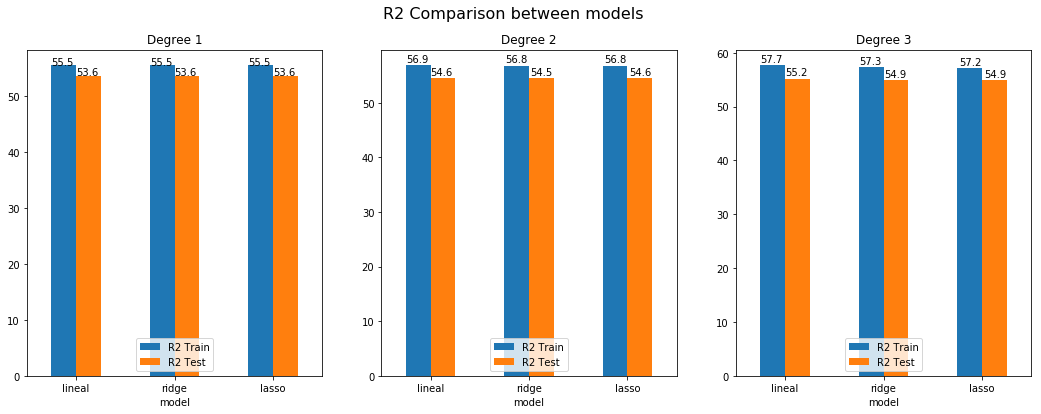

In [102]:
fig = plt.figure(figsize=(18,6))
plt.suptitle("R2 Comparison between models",fontsize=16)
ax1 = fig.add_subplot(131)
results_df.loc[results_df['degree']==1].plot(x='model',y=['R2 Train','R2 Test'],kind='bar',rot=0,title='Degree 1',ax=ax1)
ax1.legend(loc='lower center')
# plt.ylim([0.5,0.58])
for p in ax1.patches:
    ax1.annotate(str(round(p.get_height(),4)), (p.get_x() * 1.001, p.get_height() * 1.001))
    
ax2 = fig.add_subplot(132)
results_df.loc[results_df['degree']==2].plot(x='model',y=['R2 Train','R2 Test'],kind='bar',rot=0,title='Degree 2',ax=ax2)
ax2.legend(loc='lower center')
for p in ax2.patches:
    ax2.annotate(str(round(p.get_height(),4)), (p.get_x() * 1.01, p.get_height() * 1.01))

ax3 = fig.add_subplot(133)
results_df.loc[results_df['degree']==3].plot(x='model',y=['R2 Train','R2 Test'],kind='bar',rot=0,title='Degree 3',ax=ax3)
ax3.legend(loc='lower center')
for p in ax3.patches:
    ax3.annotate(str(round(p.get_height(),4)), (p.get_x() * 1.01, p.get_height() * 1.01))




plt.savefig('../Images/CABA/Scores Modelo CABA.png')

# 10. Elección del modelo

Luego de lo anterior visto, se opta por un modelo de regresión lineal sin regularización, con features polinomiales de orden 3. Si bien el modelo no mejora tanto con el agregado de features polinomiales, ni tampoco con regularización, se optó por el modelo con mejores R2 en train y test.

# 11 División del dataset en Train y Test para portfolio de 100 propiedades.

In [103]:
data_train, data_test = train_test_split(data,test_size=100,shuffle=True,random_state=8)

In [104]:
data_train_final = data_train.copy()
data_test_final = data_test.copy()

In [105]:
data_train_final.shape,data_test_final.shape

((11570, 69), (100, 69))

In [106]:
data_train_final.columns

Index(['tipo_propiedad', 'Barrio', 'cochera', 'gimnasio', 'piscina', 'SUM',
       'laundry', 'balcon', 'patio', 'parrilla', 'floor', 'rooms', 'price_usd',
       'sup_cub', 'sup_descub', 'sup_total', 'price_usd_per_m2',
       'sup_por_room', 'cub_desc', 'tipo_propiedad_apartment',
       'tipo_propiedad_house', 'tipo_propiedad_store', 'Barrio_Almagro',
       'Barrio_Balvanera', 'Barrio_Barracas', 'Barrio_Belgrano', 'Barrio_Boca',
       'Barrio_Boedo', 'Barrio_Caballito', 'Barrio_Chacarita',
       'Barrio_Coghlan', 'Barrio_Colegiales', 'Barrio_Constitucion',
       'Barrio_Flores', 'Barrio_Floresta', 'Barrio_Liniers',
       'Barrio_Mataderos', 'Barrio_Monserrat', 'Barrio_Monte Castro',
       'Barrio_Nueva Pompeya', 'Barrio_Nuñez', 'Barrio_Palermo',
       'Barrio_Parque Avellaneda', 'Barrio_Parque Chacabuco',
       'Barrio_Parque Chas', 'Barrio_Parque Patricios', 'Barrio_Paternal',
       'Barrio_Puerto Madero', 'Barrio_Recoleta', 'Barrio_Retiro',
       'Barrio_Saavedra', 'Barr

## 11.1 Imputación del número de piso ('floor')

In [107]:
data_train_final['floor'].isna().sum()

9009

In [108]:
data_test_final['floor'].isna().sum()

81

Solo se imputan datos en propiedades de tipo 'apartment'.

In [109]:
floor_median_barrio = data_train_final.loc[data_train_final['tipo_propiedad']=='apartment',['floor','Barrio']].groupby('Barrio').agg(np.median)
floor_median_barrio['floor'].fillna(value=floor_median_barrio['floor'].mean(),inplace=True)
floor_median_barrio.head(10)

,floor
Barrio,
Almagro,4.0
Balvanera,5.0
Barracas,5.0
Belgrano,3.5
Boca,11.0
Boedo,2.0
Caballito,5.0
Chacarita,6.0
Coghlan,2.5


In [110]:
for barrio,floor_med in floor_median_barrio['floor'].to_dict().items():
    #imputo en el train set con los valores calculados
    data_train_final.loc[((data_train_final['tipo_propiedad']=='apartment')&(data_train_final['floor'].isna())&(data_train_final['Barrio']==barrio)),'floor']=floor_med
    #tambien imputo en el test set con los valores del train set.
    data_test_final.loc[((data_test_final['tipo_propiedad']=='apartment')&(data_test_final['floor'].isna())&(data_test_final['Barrio']==barrio)),'floor']=floor_med

In [111]:
print("Datos faltantes de floor en train set: {}".format(data_train_final['floor'].isna().sum()))
print("Datos faltantes de floor en test set: {}".format(data_test_final['floor'].isna().sum()))

Datos faltantes de floor en train set: 0
Datos faltantes de floor en test set: 0


In [112]:
data_train_final.loc[data_train_final['floor'].isna(),'Barrio'].value_counts()

Series([], Name: Barrio, dtype: int64)

In [113]:
data_test_final.loc[data_test_final['floor'].isna(),'Barrio'].value_counts()

Series([], Name: Barrio, dtype: int64)

## 11.2 Imputación de Superficies

Columna temporal de const_index.

In [114]:
data_train_final['const_index']=data_train_final['sup_cub']/data_train_final['sup_total']
#data_test['const_index']=0
data_train_final.head(5)

,tipo_propiedad,Barrio,cochera,gimnasio,piscina,SUM,laundry,balcon,patio,parrilla,...,Barrio_Villa Lugano,Barrio_Villa Luro,Barrio_Villa Ortuzar,Barrio_Villa Pueyrredon,Barrio_Villa Real,Barrio_Villa Riachuelo,Barrio_Villa Santa Rita,Barrio_Villa Soldati,Barrio_Villa Urquiza,const_index
935,apartment,Villa Ortuzar,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.913043
3614,apartment,Almagro,1.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.842105
8596,apartment,Belgrano,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.936170
1004,apartment,Puerto Madero,1.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.833333
9463,house,Caballito,1.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.832168


In [115]:
const_median_barrio = data_train_final[['const_index','Barrio']].groupby('Barrio').median()
const_median_barrio['const_index'].fillna(value=const_median_barrio['const_index'].mean(),inplace=True)
const_median_barrio.head(10)

,const_index
Barrio,
Agronomia,0.914286
Almagro,0.930233
Balvanera,1.000000
Barracas,0.900000
Belgrano,0.902439
Boca,0.927922
Boedo,1.000000
Caballito,0.900000
Chacarita,0.918919


Imputación del índice de construcción:

In [116]:
data_train_final[['sup_cub','sup_total','sup_descub']].isna().sum()

sup_cub       1256
sup_total      565
sup_descub    1821
dtype: int64

In [117]:
for barrio,const_med in const_median_barrio['const_index'].to_dict().items():
    data_train_final.loc[(data_train_final['const_index'].isna())&(data_train_final['Barrio']==barrio),'const_index']=const_med
    data_test_final.loc[(data_test_final['Barrio']==barrio),'const_index']=const_med

Completar los datos faltantes de Superficie Cubierta y Superficie Total con el índice de construcción calculado, en el set de entrenamiento.

In [118]:
data_train_final['sup_cub'].fillna(data_train_final['const_index']*data_train_final['sup_total'],inplace=True)
data_train_final['sup_total'].fillna(data_train_final['sup_cub']/data_train_final['const_index'],inplace=True)
data_train_final['sup_descub'].fillna((data_train_final['sup_total']-data_train_final['sup_cub']),inplace=True)

Completar los datos faltantes de Superficie Cubierta y Superficie Total con el índice de construcción calculado, en el set de testeo.

In [119]:
data_test_final['sup_cub'].fillna(data_test_final['const_index']*data_test_final['sup_total'],inplace=True)
#data_test['sup_cub']/data_test['const_index']
data_test_final['sup_total'].fillna(data_test_final['sup_cub']/data_test_final['const_index'],inplace=True)
data_test_final['sup_descub'].fillna((data_test_final['sup_total']-data_test_final['sup_cub']),inplace=True)

In [120]:
data_train_final['cub_desc'] = data_train_final['sup_cub']*data_train_final['sup_descub']
data_train_final['sup_por_room'] = data_train_final['sup_cub']/data_train_final['rooms']

In [121]:
data_train_final[['sup_cub','sup_total','sup_descub','cub_desc','sup_por_room']].isna().sum()

sup_cub         0
sup_total       0
sup_descub      0
cub_desc        0
sup_por_room    0
dtype: int64

In [122]:
data_test_final['cub_desc'] = data_test_final['sup_cub']*data_test_final['sup_descub']
data_test_final['sup_por_room'] = data_test_final['sup_cub']/data_test_final['rooms']

In [123]:
data_test_final[['sup_cub','sup_total','sup_descub','cub_desc','sup_por_room']].isna().sum()

sup_cub         0
sup_total       0
sup_descub      0
cub_desc        0
sup_por_room    0
dtype: int64

In [124]:
poly_vars = ['floor','rooms','sup_cub','sup_descub','sup_por_room']
y_column = ['price_usd_per_m2']
poly_drop = ['tipo_propiedad', 'Barrio','price_usd','sup_total','const_index','cub_desc']
data_train3 = data_train_final.drop(columns=poly_drop).copy()
y_train = data_train_final[y_column[0]]
data_test3 = data_test_final.drop(columns=poly_drop).copy()
y_test = data_test_final[y_column[0]]

X_train_pol3,X_test_pol3 = get_poly_X(poly_vars = poly_vars, y_var = y_column, df_train = data_train3, df_test = data_test3,degree=3)

Xs_train_pol3 = stdscalerX.fit_transform(X_train_pol3)
ys_train_pol3 = y_train

Xs_test_pol3 = stdscalerX.transform(X_test_pol3)
ys_test_pol3 = y_test

In [125]:
data_test3.shape

(100, 64)

In [126]:
#Linear Model
lm = LinearRegression()
model_linreg3 = lm.fit(Xs_train_pol3, ys_train_pol3)

CrossValidation Score:

In [127]:
for _ in range(10):
    kf3 = KFold(n_splits=5, shuffle=True)
    print(cross_val_score(model_linreg3, Xs_train_pol3, ys_train_pol3, cv=kf3))  

[-1.421e+23  5.538e-01  5.488e-01  6.050e-01  5.587e-01]
[0.6   0.548 0.533 0.567 0.552]
[0.559 0.563 0.555 0.582 0.56 ]
[0.579 0.555 0.564 0.538 0.569]
[ 5.628e-01  5.977e-01 -3.747e+22  5.407e-01  5.833e-01]
[0.531 0.593 0.566 0.569 0.55 ]
[0.451 0.555 0.569 0.571 0.585]
[0.512 0.58  0.57  0.527 0.558]
[0.569 0.577 0.549 0.569 0.534]
[0.564 0.558 0.581 0.559 0.545]


In [128]:
y_pred_tr = model_linreg3.predict(Xs_train_pol3)
y_pred_ts = model_linreg3.predict(Xs_test_pol3)

print("Train set")
print("----------------------------")
print_metrics(y_train,y_pred_tr)
print("Test set")
print("----------------------------")
print_metrics(y_test,y_pred_ts)


Train set
----------------------------
MAE: 361.283262
MSE: 241094.181849
RMSE: 491.013423
R2: 0.5736
Test set
----------------------------
MAE: 396.288387
MSE: 256381.758887
RMSE: 506.341544
R2: 0.5029


In [129]:
#portfolio = pd.DataFrame(y_test).rename(columns={'price_usd_per_m2':'Real_Price'})
#portfolio.head(10)

In [130]:
#portfolio['Model_Prediction']=y_pred_ts
#precios_modelo = pd.DataFrame(y_pred_ts,columns={'Model_Prediction'})
#portfolio.head(10)

In [131]:
#portfolio['diff'] = portfolio['Real_Price']-portfolio['Model_Prediction']
#portfolio['Sobre/Sub'] = portfolio['diff'].apply(lambda x: 'Sobrevaluado' if x<0 else 'Subvaluado')
#portfolio['abs_diff']=portfolio['diff'].abs()
#portfolio.head(10)

In [132]:
#plt.bar(x='Sobrevaluado',height=sobrevaluados)
#plt.bar(x='Subvaluado',height=subvaluados)
#plt.ylim([0,100])

In [133]:
#portfolio.plot(y=['Real_Price','Model_Prediction'],kind='bar',figsize=(16,16))

In [134]:
#port_df = portfolio.reset_index().drop(columns='index').reset_index()
#port_plot_df = port_df.sample(100)
#display(port_plot_df)
#port_plot_df.plot(kind='scatter',x='index',y='diff',figsize=(8,6))
#plt.figure(figsize=(14,10))
#plt.stem(port_plot_df['index'],port_plot_df['diff'])
#plt.ylabel('Real Value - Predicted Value',fontsize=16)
#plt.savefig('../Images/CABA/Capital Portfolio.png')

In [135]:
portfolio = pd.DataFrame(y_test).rename(columns={'price_usd_per_m2':'Real_Price'})
portfolio['Model_Prediction']=y_pred_ts
portfolio['diff'] = portfolio['Model_Prediction']-portfolio['Real_Price']
portfolio['Sobre/Sub'] = portfolio['diff'].apply(lambda x: 'Sobrevaluado' if x>0 else 'Subvaluado')
portfolio['abs_diff']=portfolio['diff'].abs()
portfolio.head(10)

,Real_Price,Model_Prediction,diff,Sobre/Sub,abs_diff
2570,1500.000000,1684.563164,184.563164,Sobrevaluado,184.563164
9087,2115.094340,2312.125664,197.031325,Sobrevaluado,197.031325
5678,2438.596154,2646.813164,208.217010,Sobrevaluado,208.217010
11216,2307.692308,2427.781914,120.089606,Sobrevaluado,120.089606
9844,2962.169492,2661.250664,-300.918827,Subvaluado,300.918827
2413,1233.333333,1881.641289,648.307956,Sobrevaluado,648.307956
11878,2493.543478,2293.969414,-199.574064,Subvaluado,199.574064
9295,2421.052632,2290.819024,-130.233608,Subvaluado,130.233608
7075,2407.407407,2081.058281,-326.349126,Subvaluado,326.349126
5793,2132.701422,2205.094414,72.392992,Sobrevaluado,72.392992


In [136]:
sobrevaluados = portfolio.loc[portfolio['Sobre/Sub']=='Sobrevaluado','Sobre/Sub'].count()
subvaluados = portfolio.loc[portfolio['Sobre/Sub']=='Subvaluado','Sobre/Sub'].count()
sobrevaluados,subvaluados

(51, 49)

In [137]:
portfolio.describe()

,Real_Price,Model_Prediction,diff,abs_diff
count,100.000000,100.000000,100.000000,100.000000
mean,2398.341916,2347.507509,-50.834407,396.288387
std,721.808032,516.768452,506.321276,316.765971
min,513.888889,569.281914,-1607.561836,8.439001
25%,1914.565274,2011.922539,-336.146586,165.295254
50%,2344.288793,2317.418633,19.741968,318.945538
75%,2869.629808,2780.406914,301.822855,535.289844
max,4180.000000,3197.008477,1115.082261,1607.561836


In [138]:
sobrevaluados = portfolio.loc[portfolio['Sobre/Sub']=='Sobrevaluado','Sobre/Sub'].count()
subvaluados = portfolio.loc[portfolio['Sobre/Sub']=='Subvaluado','Sobre/Sub'].count()
sobrevaluados,subvaluados

(51, 49)

In [139]:
#portfolio.plot(kind='scatter',x='Real_Price',y='Model_Prediction',figsize=(8,6))

In [140]:
#plt.figure(figsize=(8,6))
#sns.regplot(x="Real_Price", y="Model_Prediction", data=portfolio)

In [141]:
#plt.figure(figsize=(8,6))
#plt.scatter(x=ys_test_pol3, y =y_pred_ts)
#plt.title('Valores predichos Vs. Valores Reales (Ridge)', fontsize=16)
#plt.ylabel('Valores Predichos')
#plt.xlabel('Valores Reales')

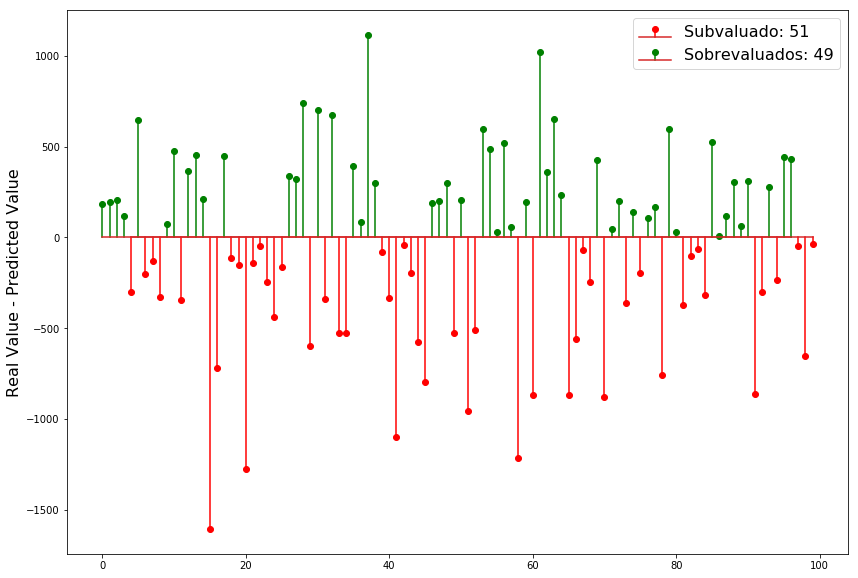

In [144]:
port_df = portfolio.reset_index().drop(columns='index').reset_index()
port_plot_df = port_df.sample(100)
#display(port_plot_df)
#port_plot_df.plot(kind='scatter',x='index',y='diff',figsize=(8,6))
plt.figure(figsize=(14,10))
sobreval = port_plot_df.loc[port_plot_df['Sobre/Sub']=='Sobrevaluado']
subval = port_plot_df.loc[port_plot_df['Sobre/Sub']=='Subvaluado']
#plt.stem(port_plot_df['index'],port_plot_df['diff'])
plt.stem(subval['index'],subval['diff'],linefmt='red',markerfmt='or',label='Subvaluado: '+str(sobrevaluados))
plt.stem(sobreval['index'],sobreval['diff'],linefmt='green',markerfmt='og',label='Sobrevaluados: '+str(subvaluados))
plt.legend(fontsize=16)
plt.ylabel('Real Value - Predicted Value',fontsize=16)
plt.savefig('../Images/CABA/Portfolio CABA.png')